In [180]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [85]:
#Reading csv data
trainData= pd.read_csv('train.csv')
testData= pd.read_csv('test.csv')
trainData.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,Ä°stanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,03-09-2013,DiyarbakÄ±r,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,02-02-2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,05-09-2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [86]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [87]:
#Numerical columns
num_col=trainData.select_dtypes(exclude=['object']).columns
num_col

Index(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue'],
      dtype='object')

In [88]:
#Categorical columns
cat_col=trainData.select_dtypes(include=['object']).columns
cat_col

Index(['Open Date', 'City', 'City Group', 'Type'], dtype='object')

In [89]:
testData.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,NiÄŸde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05-06-2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [90]:
testData

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,NiÄŸde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05-06-2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,01-05-2000,Antalya,Other,FC,5,5.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
99996,99996,07/18/2011,NiÄŸde,Other,IL,1,2.0,4.0,3.0,1,...,1.0,3.0,5,0,0,0,4,0,0,0
99997,99997,12/29/2012,Ä°stanbul,Big Cities,IL,4,5.0,4.0,4.0,1,...,4.0,1.0,5,5,3,2,4,4,4,2
99998,99998,10-12-2013,Ä°stanbul,Big Cities,FC,12,7.5,6.0,6.0,4,...,7.5,5.0,0,0,0,4,0,0,0,0


In [91]:
testData.shape

(100000, 42)

In [92]:
trainData.shape

(137, 43)

In [93]:
#get columns with null values
trainData.columns[trainData.isna().any()].tolist()

[]

In [94]:
trainData['Open Date']=pd.to_datetime(trainData['Open Date'])
trainData['Open Date']

0     1999-07-17
1     2008-02-14
2     2013-03-09
3     2012-02-02
4     2009-05-09
         ...    
132   2008-06-25
133   2006-10-12
134   2006-07-08
135   2010-10-29
136   2009-09-01
Name: Open Date, Length: 137, dtype: datetime64[ns]

In [95]:
#some analysis
trainData['Open Date']=pd.to_datetime(trainData['Open Date'], format='%Y-%m-%d')
trainData['Open Days']=" "

LastTrainDate=pd.DataFrame({'Date':np.repeat(['2018/01/01'],[len(trainData)])})
LastTrainDate['Date']=pd.to_datetime(LastTrainDate['Date'], format='%Y-%m-%d')
LastTrainDate.head()

trainData['Open Days']=LastTrainDate['Date'] - trainData['Open Date']
trainData['Open Days']=trainData['Open Days'].astype('timedelta64[D]').astype(int)

In [96]:
trainData.head(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Open Days
0,0,1999-07-17,Ä°stanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753,6743
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131,3609
2,2,2013-03-09,DiyarbakÄ±r,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379,1759
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511,2160
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715,3159


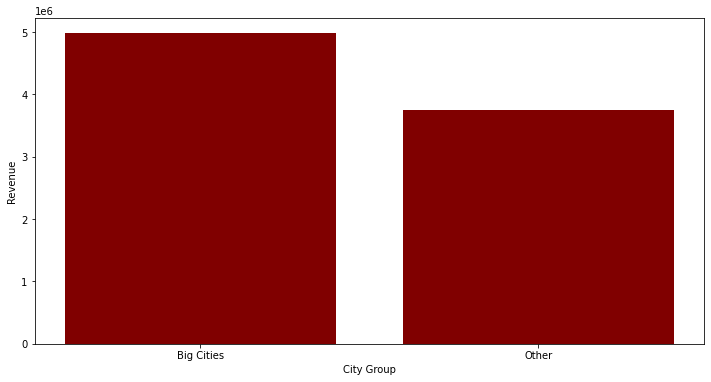

In [97]:
#Comparing Revenues of big cities and other cities
cityPer=trainData[["City Group", "revenue"]].groupby(['City Group'], as_index=False).mean()
fig=plt.figure(figsize=(12,6))
x='City Group'
y='revenue'
plt.bar(x,y,data=cityPer,color='maroon',width=0.8)
plt.xlabel("City Group")
plt.ylabel("Revenue")
plt.show()

Sorting cities by revenue;getting max earned cities

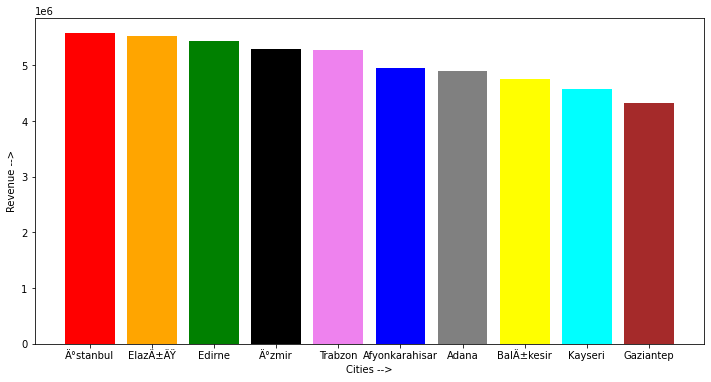

In [98]:
#Top 10 cities generating maximum revenue
cityPer=trainData[["City", "revenue"]].groupby(['City'], as_index=False).mean()
new=cityPer.sort_values(["revenue"],ascending=False)
fig=plt.figure(figsize=(12,6))
x='City'
y='revenue'
plt.bar(x,y,data=new.head(10),color=['red','orange','green','black','violet','blue','grey','yellow','cyan','brown'],width=0.8)
plt.xlabel("Cities -->")
plt.ylabel("Revenue -->")
plt.show()

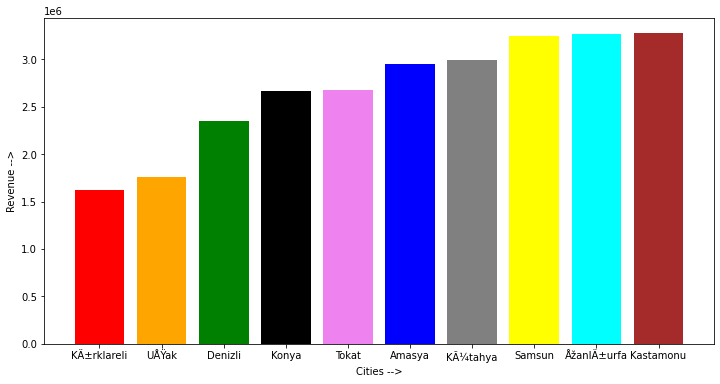

In [99]:
#Top 10 cities generating least revenue
cityPer=trainData[["City", "revenue"]].groupby(['City'], as_index=False).mean()
new=cityPer.sort_values(["revenue"],ascending=True)
fig=plt.figure(figsize=(12,6))
x='City'
y='revenue'
plt.bar(x,y,data=new.head(10),color=['red','orange','green','black','violet','blue','grey','yellow','cyan','brown'],width=0.8)
plt.xlabel("Cities -->")
plt.ylabel("Revenue -->")
plt.show()

Getting insight of which restaurant earns more


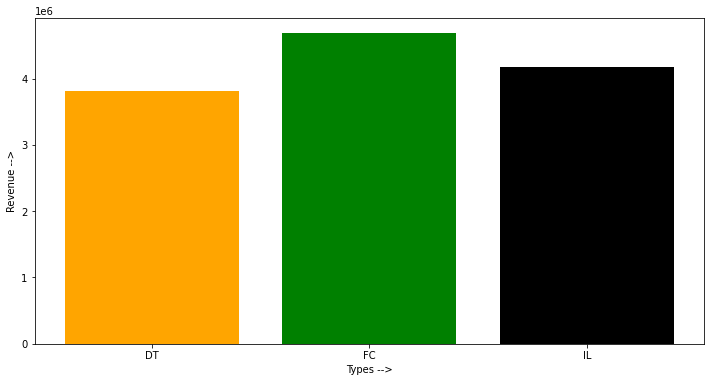

In [100]:
cityPer=trainData[["Type", "revenue"]].groupby(['Type'], as_index=False).mean()
x='Type'
y='revenue'
fig=plt.figure(figsize=(12,6))
plt.bar(x,y,data=cityPer,color=['orange','green','black'],width=0.8)
plt.xlabel("Types -->")
plt.ylabel("Revenue -->")
plt.show()

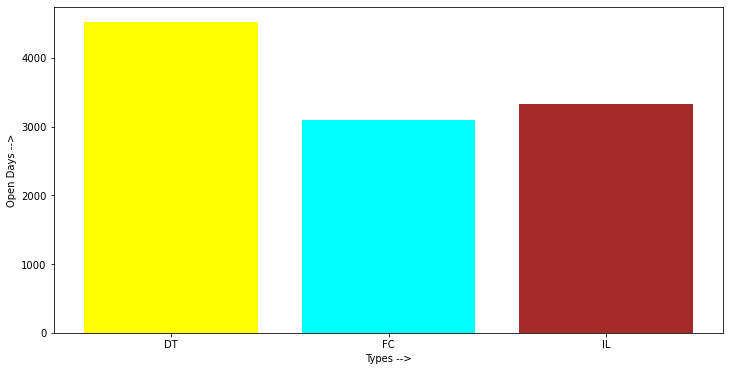

In [101]:
#Plot of working days of a specific restaurant type
cityPer=trainData[["Type", "Open Days"]].groupby(['Type'], as_index=False).mean()
x='Type'
y='Open Days'
fig=plt.figure(figsize=(12,6))
plt.bar(x,y,data=cityPer,color=['yellow','cyan','brown'],width=0.8)
plt.xlabel("Types -->")
plt.ylabel("Open Days -->")
plt.show()

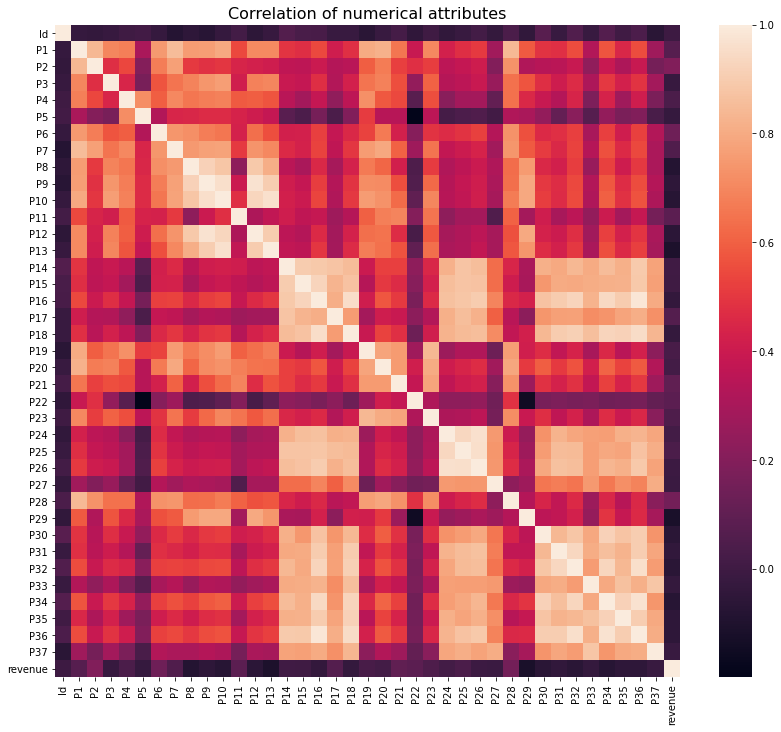

In [102]:
#Correlation
correlation = trainData[num_col].corr()

f,ax=plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes',size=16)
sns.heatmap(correlation)
plt.show()

In [103]:
correlation['revenue'].sort_values(ascending=False)

revenue    1.000000
P2         0.191518
P28        0.155534
P6         0.139094
P21        0.097411
P11        0.084247
P22        0.083562
P1         0.070217
P17        0.067137
P7         0.051165
P23        0.045507
P25        0.036365
P4         0.035685
P19        0.027984
P24        0.014222
P20        0.014147
P14        0.006441
P15        0.000742
Id        -0.006277
P26       -0.007650
P27       -0.013680
P37       -0.019051
P3        -0.024613
P5        -0.028191
P33       -0.032426
P18       -0.034537
P16       -0.037997
P31       -0.040418
P35       -0.050156
P9        -0.050352
P36       -0.050534
P12       -0.062193
P32       -0.065857
P30       -0.066203
P34       -0.072343
P10       -0.073220
P8        -0.084215
P13       -0.105085
P29       -0.114846
Name: revenue, dtype: float64

In [104]:
trainData= trainData.drop('Open Date', axis=1)
trainData= trainData.drop('Id', axis=1)
trainData.head(5)

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Open Days
0,Ä°stanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,5,3,4,5,5,4,3,4,5653753,6743
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,6923131,3609
2,DiyarbakÄ±r,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,0,2055379,1759
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,25,12,10,6,18,12,12,6,2675511,2160
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,5,1,3,2,3,4,3,3,4316715,3159


In [105]:
#Converting dummy data for categorical city column city group
citygrpDummyTrain= pd.get_dummies(trainData['City Group'])
trainData= trainData.join(citygrpDummyTrain)

In [106]:
trainData= trainData.drop('City Group', axis=1)
trainData.head()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P32,P33,P34,P35,P36,P37,revenue,Open Days,Big Cities,Other
0,Ä°stanbul,IL,4,5.0,4.0,4.0,2,2,5,4,...,4,5,5,4,3,4,5653753,6743,1,0
1,Ankara,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,6923131,3609,1,0
2,DiyarbakÄ±r,IL,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,2055379,1759,0,1
3,Tokat,IL,6,4.5,6.0,6.0,4,4,10,8,...,10,6,18,12,12,6,2675511,2160,0,1
4,Gaziantep,IL,3,4.0,3.0,4.0,2,2,5,5,...,3,2,3,4,3,3,4316715,3159,0,1


In [107]:
testData['Open Date']=pd.to_datetime(testData['Open Date'])
testData['Open Date']

0       2011-01-22
1       2011-03-18
2       2013-10-30
3       2013-05-06
4       2013-07-31
           ...    
99995   2000-01-05
99996   2011-07-18
99997   2012-12-29
99998   2013-10-12
99999   2010-10-05
Name: Open Date, Length: 100000, dtype: datetime64[ns]

In [108]:
#some analysis
testData['Open Date']=pd.to_datetime(testData['Open Date'], format='%Y-%m-%d')
testData['Open Days']=" "

LastTestDate=pd.DataFrame({'Date':np.repeat(['2018/01/01'],[len(testData)])})
LastTestDate['Date']=pd.to_datetime(LastTestDate['Date'], format='%Y-%m-%d')
LastTestDate.head()

testData['Open Days']=LastTestDate['Date'] - testData['Open Date']
testData['Open Days']=testData['Open Days'].astype('timedelta64[D]').astype(int)

#Converting dummy data for categorical city column city group
citygrpDummyTest= pd.get_dummies(testData['City Group'])
testData= testData.join(citygrpDummyTest)

testData= testData.drop('City Group', axis=1)

In [109]:
testData.head()

,Id,Open Date,City,Type,P1,P2,P3,P4,P5,P6,...,P31,P32,P33,P34,P35,P36,P37,Open Days,Big Cities,Other
0,0,2011-01-22,NiÄŸde,FC,1,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,2536,0,1
1,1,2011-03-18,Konya,IL,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,2481,0,1
2,2,2013-10-30,Ankara,FC,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,1524,1,0
3,3,2013-05-06,Kocaeli,IL,2,4.0,4.0,4.0,2,3,...,4,0,0,0,0,0,0,1701,0,1
4,4,2013-07-31,Afyonkarahisar,FC,2,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,1615,0,1


In [167]:
import numpy
xtrain=pd.DataFrame({'Open Days' :trainData['Open Days'].apply(numpy.log),
                    'Big Cities' :trainData['Big Cities'], 'Other' :trainData['Other'],
                    'P1' :trainData['P1'], 'P2' :trainData['P2'], 'P4' :trainData['P4'],
                    'P5' :trainData['P5'], 'P6' :trainData['P6'], 'P7' :trainData['P7'],
                    'P11' :trainData['P11'], 'P14' :trainData['P14'], 'P15' :trainData['P15'],
                    'P17' :trainData['P17'], 'P19' :trainData['P19'], 'P20' :trainData['P20'],
                    'P21' :trainData['P21'], 'P23' :trainData['P23'], 'P24' :trainData['P24'],
                    'P25' :trainData['P25'], 'P28' :trainData['P28']})

ytrain=trainData['revenue'].apply(numpy.log)

xtest=pd.DataFrame({'Open Days' :testData['Open Days'].apply(numpy.log),
                    'Big Cities' :testData['Big Cities'], 'Other' :testData['Other'],
                    'P1' :testData['P1'], 'P2' :testData['P2'], 'P7' :testData['P7'],
                    'P4' :testData['P4'], 'P5' :testData['P5'], 'P6' :testData['P6'],
                    'P11' :testData['P11'], 'P14' :testData['P14'], 'P15' :testData['P15'],
                    'P17' :testData['P17'], 'P25' :testData['P25'], 'P24' :testData['P24'],
                    'P19' :testData['P19'], 'P20' :testData['P20'], 'P21' :testData['P21'],
                    'P23' :testData['P23'], 'P28' :testData['P28']})

In [168]:
#Standard Scaling for model efficiency
from sklearn.preprocessing import StandardScaler

sc=StandardScaler(with_std = True, with_mean= True, copy=True)
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [169]:
from sklearn.linear_model import LinearRegression

In [170]:
model = LinearRegression()

In [171]:
model.fit(xtrain,ytrain)

LinearRegression()

In [172]:
model.coef_

array([ 0.1527054 ,  0.02747699, -0.02747699, -0.14361925,  0.0787579 ,
       -0.01090771,  0.00158735, -0.02026236,  0.1036624 ,  0.00563142,
       -0.1387505 , -0.00776322,  0.11856192, -0.06587755, -0.16436478,
        0.03610181,  0.14322293, -0.06509634,  0.0686325 ,  0.14361811])

In [173]:
ypred = model.predict(xtest)

In [174]:
ypred

array([15.35369131, 15.00883537, 15.03731684, ..., 14.96304114,
       15.61106636, 14.91130057])

In [175]:
print('%.1f%%'%(model.score(xtrain, ytrain) * 100))

25.3%
